In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist # calculate distance matrix
from scipy.linalg import lu # calculate LU decomposition
from scipy.optimize import minimize # minimization of scalar function
from itertools import combinations

# 1. Generate $Y$

## 1-1. Distance matrix

 $ d_{ij} = ||X_i - X_j||$

In [62]:
# function that makes coordincates of data points
def make_coords(N_points, xmu, xsd, ymu, ysd):
  x_coords = np.random.normal(xmu, xsd, size=N_points)
  y_coords = np.random.normal(ymu, ysd, size=N_points)
  coords = np.column_stack((x_coords, y_coords))

  return coords

In [63]:
# function that calculates distances between coordinates
def distances(coords):
  distances = cdist(coords, coords, metric='Euclidean')

  return distances

In [64]:
np.random.seed(24)

In [65]:
# set parameters
p = 1000 # dimensionaltiy

In [66]:
# get coordinates
coord = [0, 1, 0, 1] # xmu, xsd, ymu, ysd
X = make_coords(p, *coord)

In [67]:
# get distance matrix
d = distances(X)
d.shape

(1000, 1000)

## 1-2. Covariance Matrix $\Sigma$
$ \Sigma = Cov(Y_i, Y_j|X) = \theta_1 \exp(-\frac{1}{\theta_2} d_{ij}) $

In [68]:
# function that makes covariance matrix Sigma
def Sigma(param, dis):
  theta1, theta2 = param[0], param[1]
  cov = theta1*np.exp((-1/theta2)*dis) # distance matrix is a square matrix
  return cov

In [69]:
# set parameter for Sigma
paramTrue = [1, 1/2]
SigmaTrue = Sigma(paramTrue, d)

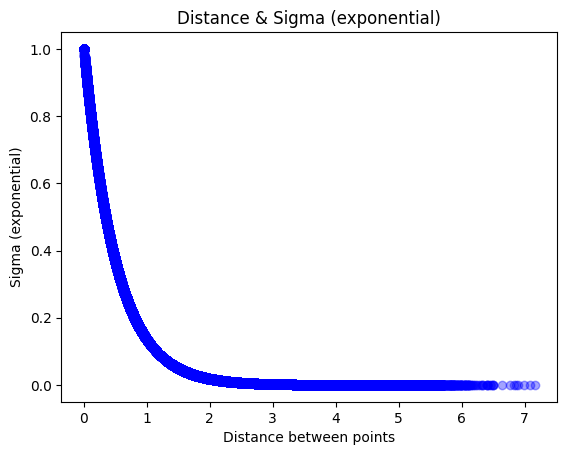

In [70]:
# plotting
d_plot = d.reshape((p*p,))
Sigma_plot = SigmaTrue.reshape((p*p,))
data = pd.DataFrame({'Distances': d_plot, 'Sigma(exp)': Sigma_plot})

plt.scatter(data['Distances'], data['Sigma(exp)'], c='blue', alpha=0.2)
plt.ylabel('Sigma (exponential)')
plt.xlabel('Distance between points')
plt.title('Distance & Sigma (exponential)')
plt.show()

# 1-3. Generate data $Y$
* $ Y = \Sigma^{1/2} \cdot U $
  * $\Sigma$ is positive semi definite
  * $U \sim N(0, I_p)$

* Dataframe of $Y$ ; N $\times$ p
  * Size: N = 1000
  * Dimensionality: p = 1000







In [71]:
# get sigmahalf
## cf. check if SigmaTrue is positive definite
pd = np.linalg.eig(SigmaTrue)[0].min() > 0
if pd:
    SigmaHalf = np.linalg.cholesky(SigmaTrue)
    print('Covariance matrix is positive definite')
else:
    print('Covariance matrix is not positive definite')

Covariance matrix is positive definite


In [72]:
import pandas as pd

In [73]:
N = 1000 # size

results = []

for i in range(N):
  U = np.random.normal(0, 1, p).reshape(p, 1)
  results.append(np.dot(SigmaHalf, U))

col_names = ['y{}'.format(i+1) for i in range(p)]
y_df = pd.DataFrame(np.reshape(results, (N, p)), columns=col_names)

In [74]:
y_df

,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,...,y991,y992,y993,y994,y995,y996,y997,y998,y999,y1000
0,0.966046,1.775346,0.599164,-0.839672,-0.084655,0.341543,1.323034,-2.209591,-0.518855,0.376411,...,0.162970,-2.316778,-1.185097,-0.496510,-0.370612,-0.975188,-0.718446,0.113068,1.022352,-0.352619
1,2.393400,0.450626,1.433768,1.612866,-0.476857,0.898268,0.042825,0.284700,-1.508961,1.452731,...,0.344293,0.926663,1.194961,0.052463,0.752668,0.629745,1.688492,0.039049,-0.673219,0.895955
2,-0.625257,2.874973,0.742736,-1.648571,-0.153189,-1.048965,0.701250,1.000719,1.570132,0.498331,...,2.275797,-0.301574,0.881046,0.344375,0.383954,0.122223,0.155925,0.456709,0.560523,-0.530414
3,0.006726,0.040741,-0.242087,1.147991,-1.116994,-0.184833,-0.256265,-1.143928,0.649491,0.206607,...,0.913123,-0.994950,-0.460075,0.867110,-0.551781,0.466385,0.583244,1.420644,-0.915688,0.130434
4,-0.063888,-0.885156,0.729430,-0.513074,0.830621,1.117916,-0.371463,0.325153,0.566453,-0.288513,...,0.345006,0.267382,1.040647,0.743624,-0.859063,0.679218,-2.146815,-0.052189,0.173046,0.465344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.147312,-1.256224,0.189383,-0.332228,-0.856709,1.612887,0.448688,-0.840065,0.425878,-0.406725,...,0.215262,-0.823384,-0.579902,-0.796584,-0.379277,-0.701660,-0.451007,0.456777,-1.237478,-1.224208
996,0.163310,2.237715,-2.478200,0.727329,1.545102,0.413323,-1.778230,-1.007244,2.049182,-2.642334,...,0.192374,1.015125,0.330601,1.172092,-0.520840,1.546315,0.381750,-1.722642,-1.524162,0.555440
997,-0.869872,-0.486099,-0.181179,-1.726577,0.254294,0.771226,-2.496686,-0.848520,0.039850,-2.836175,...,-1.028848,0.352277,0.173836,0.742503,-1.041716,-0.211410,-1.777484,-1.744284,-1.021897,-0.170685
998,1.038216,-2.114157,1.227039,-1.038599,-0.205484,0.182862,1.679698,0.222698,0.675658,1.224111,...,-0.593254,0.974144,0.093047,0.235334,2.397407,0.166608,0.928289,1.947477,-0.556383,0.618812


# 2. Calculated Covariance


In [75]:
cov = np.cov(y_df.T) # cf. np.cov; each row represents variavble, each column a single observation
cov.shape

(1000, 1000)

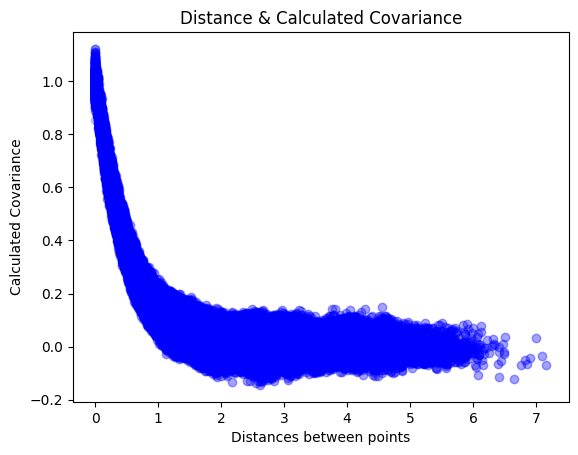

In [76]:
# plotting
d_plot = d.reshape((p*p,)) # distance matrix
cov_plot = cov.reshape((p*p, ))
data = pd.DataFrame({'Distances': d_plot, 'Calculated Covariance': cov_plot})

plt.scatter(data['Distances'], data['Calculated Covariance'], c='blue', alpha=0.2)
plt.ylabel('Calculated Covariance')
plt.xlabel('Distances between points')
plt.title('Distance & Calculated Covariance')
plt.show()

# 3. Regression
reg yi*yj on |xi-xj|

In [77]:
# get pairs of yi & yj
column_pairs = list(combinations(col_names, 2))

In [78]:
distances = pd.DataFrame(d, index=col_names, columns=col_names)
distances.head()

,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,...,y991,y992,y993,y994,y995,y996,y997,y998,y999,y1000
y1,0.000000,2.327442,2.250025,2.345648,2.515031,2.777754,1.530025,1.050538,3.913106,1.341971,...,1.814370,0.954650,0.796293,3.167285,4.243031,2.283695,1.917115,0.937415,1.681206,0.686773
y2,2.327442,0.000000,2.579872,0.695273,0.393191,1.407513,1.372305,1.600125,1.779115,1.020779,...,0.654178,2.812528,1.996718,0.842291,3.046544,0.469824,1.118415,1.629337,2.585717,3.013998
y3,2.250025,2.579872,0.000000,1.997690,2.407703,1.718365,2.992294,1.478695,4.303379,2.351164,...,1.984423,1.671800,1.482327,3.094908,2.379873,2.161459,3.131195,2.611653,3.773819,2.565126
y4,2.345648,0.695273,1.997690,0.000000,0.413860,0.732215,1.837916,1.393055,2.307980,1.277586,...,0.570461,2.589622,1.798652,1.110465,2.407894,0.229071,1.699166,1.893845,3.016932,3.004110
y5,2.515031,0.393191,2.407703,0.413860,0.000000,1.051739,1.732831,1.658801,1.895917,1.290385,...,0.710394,2.879149,2.068263,0.733956,2.661404,0.272758,1.506478,1.918340,2.943908,3.193876


In [79]:
# get distance pairs of yi & yj
dis_pairs = [(distances[yi][yj]) for yi, yj in column_pairs]

In [80]:
# yi*yj pairs
y1 = y_df.loc[0,:]

product_pairs = []
index_names = []

for i in range(1, N):
    for j in range(i+1, N+1):
        product_pairs.append(y1['y{}'.format(i)]*y1['y{}'.format(j)])
        index_names.append('y{}*y{}'.format(i,j))

In [86]:
# Perform polynomial regression
degree = 1  # Degree of the polynomial regression
coefficients = np.polyfit(dis_pairs, product_pairs, degree)

# Generate fitted values using the polynomial coefficients
fitted_values = np.polyval(coefficients, dis_pairs)

In [87]:
np.shape(fitted_values)

(499500,)

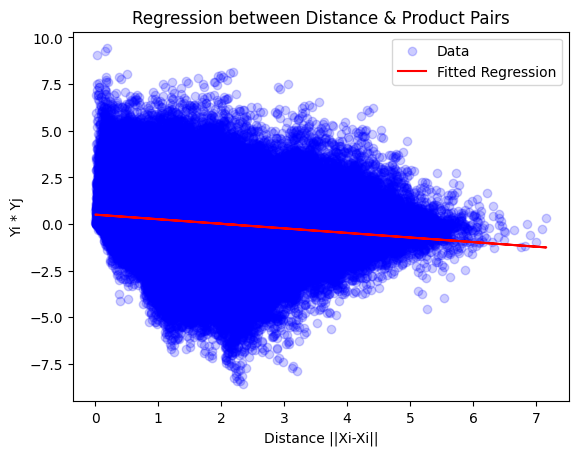

In [90]:
# Plot the original data and the fitted regression line
plt.scatter(dis_pairs, product_pairs, color='blue', label='Data', alpha=0.2)
plt.plot(dis_pairs, fitted_values, color='red', label='Fitted Regression')
plt.xlabel('Distance ||Xi-Xi||')
plt.ylabel('Yi * Yj')
plt.title('Regression between Distance & Product Pairs')
plt.legend()
plt.show()